In [ ]:
!apt-get update
!apt-get install libmariadbclient-dev libmariadb-client-lgpl-dev
!apt-get install unixodbc-dev
!apt-get install libmysqlclient-dev
!apt-get install zlib1g-dev 
!apt-get install libgdal-dev libproj-dev

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("rgdal")

In [ ]:
%%R
install.packages("GISTools")

In [ ]:
%%R
install.packages("classInt")

In [ ]:
%%R
install.packages("openxlsx")

In [ ]:
%%R
install.packages("XML")

In [ ]:
%%R
install.packages("DBI")

In [ ]:
%%R
install.packages("RMySQL")

In [ ]:
%%R
install.packages("SmarterPoland")

In [ ]:
%%R
install.packages("data.table")

# ȘD - Scop Laboratorul 2
Scopul laboratarului 2 de Știința Datelor este:

  -  dezvoltarea capacității de colectare a datelor
  -  dezvoltarea abilitățlori matematice necesare pentru laboratoarele de ȘD



# Colectare
Un process important în știința datelor este acela de colectare a datelor.
Vom folosi datele prezentate în https://ec.europa.eu/eurostat/databrowser/view/educ_uoe_enrt01/default/table?lang=en
https://ec.europa.eu/eurostat/ramon/nomenclatures/index.cfm?TargetUrl=LST_NOM_DTL_LINEAR&StrNom=CL_ISCED11&StrLanguageCode=EN&IntCurrentPage=2


## Descarcare fisiere
R are o parte de scripting. Putem folosi funcții precum ls, rm, mv. Înainte
de a descărca fișiere trebuie să creăm un director unde vom pune aceste
fișiere.

In [12]:
%%R
if(!dir.exists("data")) {dir.create("data")}


După ce am creat acest director avem nevoie de path-ul fișierul și respectiv
url-ul către fișeierul pe care dorim să îl descărcăm.

In [13]:
%%R
file_path <- file.path("data","fisier_nou.txt")
file_url <- "https://raw.githubusercontent.com/sdcioc/LaburiSD/main/data/fisier.txt"

Acum putem descărca fișierul: 

In [14]:
%%R
download.file(file_url, destfile=file_path, method="curl")

## Fisiere locale
O dată ce avem fișieul local putem să îl citim. Vom trece mai departe prin mai multe formate
de fișiere.
### TXT format
Pentru fișiere txt putem folosi funcția read.table. Separatorul în fișierul descărcat precedent
este "," și fișierul are antet.

In [54]:
%%R
file_path <- file.path("data", "fisier.txt")
file_url <- "https://raw.githubusercontent.com/sdcioc/LaburiSD/main/data/fisier.txt"
download.file(file_url, destfile=file_path, method="curl")
data <- read.table(file_path)
head(data)

  worktime sector sex isced11 country Year Total
1       FT   PRIV   F     ED5      AT 2005    NA
2       FT   PRIV   F     ED5      BE 2005    NA
3       FT   PRIV   F     ED5      BG 2005    NA
4       FT   PRIV   F     ED5      CH 2005    NA
5       FT   PRIV   F     ED5      CY 2005    NA
6       FT   PRIV   F     ED5      CZ 2005    NA


### CSV format
Pentru fișiere csv.

In [55]:
%%R
file_path <- file.path("data","fisier.csv")
file_url <- "https://raw.githubusercontent.com/sdcioc/LaburiSD/main/data/fisier.csv"
download.file(file_url, destfile=file_path, method="curl")
data <- read.csv(file_path)
head(data)

  X worktime sector sex isced11 country Year Total
1 1       FT   PRIV   F     ED5      AT 2005    NA
2 2       FT   PRIV   F     ED5      BE 2005    NA
3 3       FT   PRIV   F     ED5      BG 2005    NA
4 4       FT   PRIV   F     ED5      CH 2005    NA
5 5       FT   PRIV   F     ED5      CY 2005    NA
6 6       FT   PRIV   F     ED5      CZ 2005    NA


### XLSX format
pentru fișiere xlsx

In [56]:
%%R
library("openxlsx")
file_path <- file.path("data","fisier.xlsx")
file_url <- "https://raw.githubusercontent.com/sdcioc/LaburiSD/main/data/fisier.xlsx"
download.file(file_url, destfile=file_path, method="curl")
data <- read.xlsx(file_path, sheet = 1)
head(data)

  X1 worktime sector sex isced11 country Year Total
1  1       FT   PRIV   F     ED5      AT 2005    NA
2  2       FT   PRIV   F     ED5      BE 2005    NA
3  3       FT   PRIV   F     ED5      BG 2005    NA
4  4       FT   PRIV   F     ED5      CH 2005    NA
5  5       FT   PRIV   F     ED5      CY 2005    NA
6  6       FT   PRIV   F     ED5      CZ 2005    NA


### XML format

In [57]:
%%R
library("XML")
file_path <- file.path("data","fisier.xml")
file_url <- "https://raw.githubusercontent.com/sdcioc/LaburiSD/main/data/fisier.xml"
download.file(file_url, destfile=file_path, method="curl")
data <- xmlTreeParse(file_path, useInternal=TRUE)
root_node <- xmlRoot(data)
head(xmlSApply(root_node, xmlValue))
head(xpathSApply(root_node, "//country", xmlValue))

[1] "AT" "BE" "BG" "CH" "CY" "CZ"


### JSON format
pentru fișiere json.

In [58]:
%%R
library("jsonlite")
file_path <- file.path("data","fisier.json")
file_url <- "https://raw.githubusercontent.com/sdcioc/LaburiSD/main/data/fisier.json"
download.file(file_url, destfile=file_path, method="curl")
data <- fromJSON(file_path)
head(data)

  worktime sector sex isced11 country Year Total
1       FT   PRIV   F     ED5      AT 2005    NA
2       FT   PRIV   F     ED5      BE 2005    NA
3       FT   PRIV   F     ED5      BG 2005    NA
4       FT   PRIV   F     ED5      CH 2005    NA
5       FT   PRIV   F     ED5      CY 2005    NA
6       FT   PRIV   F     ED5      CZ 2005    NA


## Baze de date
O altă sursă pentru informații o reprezintă bazele de date.  Voi prelua una dintre cele mai folosite în știința datelor MySQL, dar sunt variante și pentru MongoDB, Cassandra, Oracle etc. o conecxiune se face cu dbConnect oferinf parola si calea la care să se lege.  Pot fi trimise în două feluri cereriile către baza de date prin getqueery care returnează răspunsul. Sau prin send querry care trimite doar cerrea către baza de date iar răspunsul poae fi luat mai târziu pe părți. Efificient din punct de vedere al memoriei. La final se eliberea întrebarea din memoria bazei de date. Și Ne deconectăm de la baza de date.

### RMySql

In [59]:
%%R
library("DBI")
library("RMySQL")
uDBC <- dbConnect(MySQL(), user="genome", host="genome-mysql.cse.ucsc.edu")
response <- dbGetQuery(uDBC, "show databases;")
head(response, n=5)
question <-dbSendQuery (uDBC, "show databases;")
answer <- fetch(question, n = 10)
dbClearResult(question)
print(answer)
dbDisconnect(uDBC)

   Database
1   acaChl1
2   ailMel1
3   allMis1
4   allSin1
5   amaVit1
6   anaPla1
7   ancCey1
8   angJap1
9   anoCar1
10  anoCar2
[1] TRUE


## Pagini Web
Următoarea sursă sunt paginiile web pe care putem să le descărcăm complet în scripturi. Sunt 3 variante, prin a face o conexiune url la pagina și a citi toate liniile într-o variabilă., de a folosi XML pentru a citi pagina formatată html sau de a folosi biblioteca httr care permite autentificare în plus și respectiv păstrarea de cookies.

### url

In [62]:
%%R
con=url("https://ocw.cs.pub.ro/courses/pr/labs/04")
codhtml <- readLines(con)
codhtml[1:10]
close(con)

### xml

In [22]:
%%R
library("XML")
url <- "https://ocw.cs.pub.ro/courses/pr/labs/04"
codhtml <- htmlTreeParse(url, useInternalNodes = TRUE)
root_node <- xmlRoot(codhtml)
head(xmlSApply(root_node, xmlValue))

                                      body 
"https://ocw.cs.pub.ro/courses/pr/labs/04" 


### httr

In [63]:
%%R
library("httr")
#html <- GET(url, authenticate("", ""))
url <- "https://ocw.cs.pub.ro/courses/pr/labs/04"
html <- GET(url)
html_content <- content(html, as="text")
codhtml <- htmlParse(html_content, asText = TRUE)
root_node <- xmlRoot(codhtml)
head(xmlSApply(root_node, xmlValue), n=1)
#pagina <- handle(url) #pentru păstrare cookies
#GET(handle=pagina, path="/")

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             head 
"\n    Laboratorul 04. OSPFv3 advanced    [CS Open CourseWare]\n  /*<![CDATA[*/var NS='pr:labs';var JSINFO = {\"id\":\"pr:labs:04\",\"namespace\":\"pr:labs\",\"isadm

## Interfață de programare a aplicațiilor
O altă metodă de colectare a datelor de pe platforme mai complexe este prin intermediul interfețelor de programare a aplicațiilor. Mare parte din ele se fac prin Oauth, dar am pus link-uri pentru fiecare implementare pentru diferite platforme. Se poate căuta „platformă R programming API package” , este un mod de analiza chiar datele voastre personale sau a prieteniilor.

Facebook[https://cran.r-project.org/web/packages/Rfacebook/], Twitter [https://www.rdocumentation.org/packages/twitteR], Google [https://cran.r-project.org/web/packages/googleAuthR/vignettes/setup.html], Github[https://cran.r-project.org/web/packages/httr/vignettes/api-packages.html]




# Test de clasificare binară
Se consider un test de clasificare binară un test care depistează un atribut ce împarte o populație în două. Cele mai populare test sunt cele din medicină care spun dacă ești pozitiv pentru un anumit virus.

## Definiții matematice
Fie $X=\{ \textrm{toți oameni care au făcut un test covrig} \}$ .
Fie $B=\{x 	\in X \mid x \quad \textrm{are Covrig} \}$ și $S=\{x	\in X \mid x \quad \textrm{nu are Covrig} \}$   .
Fie $T$ un test atunci $P=\{x	\in X \mid x \quad \textrm{a ieșit pozitiv la testul} \quad T\}$ 
și $N=\{x 	\in  X \mid x  \quad \textrm{a ieșit negativ la testul} \quad T\}$ .
Avem următoarele proprietăți: $X=B \cup S,B \cap S= \emptyset,  X=P \cup N,P \cap N= \emptyset$ .
În general $\mid B \mid=\mid S \mid$ .

\begin{array}{ |p{0.3\linewidth}|p{0.3\linewidth}|p{0.3\linewidth}| }
 \hline
 \text{Denumire} & \text{Formulă} & \text{Descriere} \\ 
 \hline
 \hline
 \text{AP} & B \cap P & \text{adevărat pozitivi} \\ 
 \hline
 \text{AN} & S \cap N & \text{adevărat negativi} \\ 
 \hline
 \text{FN} & B \cap N & \text{falși negativi} \\ 
 \hline
 \text{FP} & S \cap P & \text{falși pozitivi} \\ 
 \hline
 \text{pB} & \mid B \mid / \mid X \mid & \text{proporția din populație care au boala} \\ 
 \hline
 \text{pS} & \mid S \mid / \mid X \mid & \text{proporția din populație care sunt sănătoși} \\ 
 \hline
 \text{p(AP)} & \mid B \cap P \mid / \mid B \mid & \text{rata de adevărat pozitivi} \\ 
 \hline
 \text{p(FP)} & \mid S \cap P \mid / \mid S \mid & \text{rata de falși pozitivi} \\ 
 \hline
 \text{p(AN)} & \mid S \cap N \mid / \mid S \mid & \text{rata de adevărat negativi} \\ 
 \hline
 \text{p(FN)} & \mid B \cap N \mid / \mid B \mid & \text{rata de falși negativi} \\ 
 \hline
 \hline
\end{array}



## Matrice de confuzie
Matricea de confuzie este o matrice 2x2 unde coloane reprezintă partea din populație care este bolnavă sau sănătoasă iar rânduri rezultatul la test. Fiecare celulă conține numărul de oameni care fac parte dintr-o anumită parte a populație cu un anumit rezultat la test.

\begin{array}{ |c|c|c| } 
 \hline
 \text{Test} & \text{Bolnavi} & \text{Sănătoși} \\ 
 \hline
 \hline
 \text{Pozitiv} & 96 & 2 \\ 
 \hline
 \text{Negativ} & 4 & 98 \\ 
 \hline
 \hline
\end{array}

În R pentru a calcula matricea de confuzie se folosește funcția table. Un exemplu putem da pe setul de date mtcars care conține date despre mai mașini. Propun un test teoretic în care în funcție de cai putere spunem dacă mașina poate faci mai mult de 20 de mile cu un galon de combustibil. Îns etul de date există și adevarată valoare, dar vom verifica dacă tesul nostru este bun.


In [65]:
%%R
data <- table(mtcars$hp<110, mtcars$mpg>20)
dimnames(data) <- list(c("<110",">=110"), c(">20","<=20"))
print(data)
pozitive_rate = data[1,1]/sum(data[,1])
print(pozitive_rate)

      >20 <=20
<110   17    4
>=110   1   10
[1] 0.9444444


# Termeni Statistici


## Media
Media: se calculeaza suma tuturor valorilor si se imparte la numarul total de 
intrari de setul de date

In [66]:
%%R
x <- c(1,2,3,4,5,1,2,3,1,2,4,5,2,3,1,1,2,3,5,6) # our data set
mean.result = mean(x) # calculate mean
print (mean.result)

[1] 2.8


## Mediana
Mediana se obtine ordonand crescator numerele din setul de date si extragand 
valoarea de la pozitia din mijloc. In cazul sirurile cu numar par de elemente,
se face media aritmetica a elementelor din pozitiile de mijloc.

In [26]:
%%R
x <- c(1,2,3,4,5,1,2,3,1,2,4,5,2,3,1,1,2,3,5,6) # our data set
median.result = median(x) # calculate median
print (median.result)

[1] 2.5


## Variația
Variatia ne spune cat de departate sunt numerele din serie de medie.

In [67]:
%%R
x <- c(1,2,3,4,5,1,2,3,1,2,4,5,2,3,1,1,2,3,5,6) # our data set
variance.result = var(x) # calculate variance
print (variance.result)

[1] 2.484211


## Deviația Standard
Deviatia standard este radicalul variatiei si e o masura prin care se
cuantifica dispersia setului de date.
A aparut din cauza dezavantajelor masurarii variatiei:
- Se exprimă cu unităţile de măsurăale variabilei, ridicate la pătrat
- Are în general valori foarte mari comparativ cu media.

In [68]:
%%R
x <- c(1,2,3,4,5,1,2,3,1,2,4,5,2,3,1,1,2,3,5,6) # our data set
sd.result = sqrt(var(x)) # calculate standard deviation
print (sd.result)

[1] 1.576138


## Modulul
Clasa sau valoarea corespunzătoare frecvenţei maxime dintr-o serie statistică se  numeşte mod.

In [29]:
%%R
mode <- function(x) {
     ux <- unique(x)
     ux[which.max(tabulate(match(x, ux)))]
}
 
x <- c(1,2,3,4,5,1,2,3,1,2,4,5,2,3,1,1,2,3,5,6) # our data set
 
mode.result = mode(x) # calculate mode (with our custom function named ‘mode’)
print (mode.result)

[1] 1


## Cuantile
În statistică și probabilitate, cuantilele sunt puncte tăiate împărțind intervalul unei distribuții de probabilitate în intervale continue cu probabilități egale sau împărțind observațiile într-un eșantion în același mod.
Exemplu:
- Decile. Pe eşantioane mai mari de multe sute de indivizi. Sunt 9 decile,  fiecare corespunzând unui procent de 10%, 20%, ..., 90% din eşantion. Decila a 5-a este mediana. 
- Centilele. Folosite, în studii pe mii de cazuri, de obicei de un interes mai  larg, naţional, internaţional şi sunt corespunzătoare procentelor de 1%, 2%, ..., 99% din lot. Centila a 50-a este mediana.

In [69]:
%%R
quantile(x <- rnorm(1001))
quantile(x,  probs = c(0.1, 0.5, 1, 2, 5, 10, 50, NA)/100)

       0.1%        0.5%          1%          2%          5%         10% 
-3.16771462 -2.68370448 -2.37080259 -2.15280789 -1.60578569 -1.19990175 
        50%             
 0.07944572          NA 


# Rată de creștere

Există doup tipuri de cresteri:
- creștere discretă, atunci când schimbările apar la intervale specifice
- creștere continua: atunci când schimbările sunt permanente

Rată de creștere discretă : $a*(1+r)^t$

Rată de creștere continuă : $a*e^{(r*t)}$

## Utilitate : Exemplu dobândă bancă

Dobândă discretă este simplă. Este pe intervale fixe de timp în general ani.
Câți bani voi avea dacă depun 1000 de lei la o dobândă de 5% pe an după 2 ani.

In [31]:
%%R
initial = 1000
rate = 0.05
time = 2
initial * ((1+rate)^time)

[1] 1102.5


Dobânda continuă a apărut datorită lui Euler care și întrebat prietenul bancher: Dar nu ai vrea tu să îmi dai jumăte din dobândă pe jumăte din perioadă de mai multe ori până perioada a ajuns la o secundă. Considerând dobânda inițială de r% pe an și n numărul decâte ori a fost înjumătățită dobând și timpul rezultă suma finală ar fi $a*(1+\frac{r}{2^{n}})^{2^n*t}=a*(1+\frac{1}{2^{n}/r})^{\frac{2^n}{r}*(r*t)}$ . Înlocuim $m=\frac{2^n}{r}$ și rezultă că suma finală o să aibă forma $a*(1+\frac{1}{m})^{m*(r*t)}$ trecând în limită de m la infinit rezultă că suma finală are forma $a*e^{(r*t)}$. Deci pentru o dobândă continuă de 5% pe termen de 2 ani cu suma initială de 1000 de lei vom avea o sumă finală mai mare decât la dobânda discretă, deci Euler și-a păcălit prietenul.

In [32]:
%%R
initial = 1000
rate = 0.05
time = 2
initial * exp(rate*time)

[1] 1105.171



## Exemplu: Cresterea populatiei
In functie de tipul de populatie, cresterea poate fi continua, precum in cazul unei colonii de bacterii, unde putem prezice cresterea populatiei dupa o anumita perioada de timp, dar poate fi si discreta, cum e in cazul tigrilor, care au o
perioada de imperechere


## Exemplu: Bursa 
Valoarea indecsilor de la bursa se schimba in fiecare zi, pare o modificare continua, dar nu exista o rata predictibila. Vedem o multime de salturi si pentru a putea obtine informatii concludente, se fac studii anuale. De obicei, 
bursa se descrie printr-o crestere discreta anuala.




# Probabilități

Pentru a explica mai bine termenii de statistici ne vom folosi de 2 albume de muzică VOL. 3 - L'ESPERANCE HITS 2008 [https://www.lautarul.shop/en/manele/1827-vol-lesperance-hits.html] vol 3 și FORTZA MANELE [https://www.lautarul.shop/en/manele/780-fortza-manele.html].

\begin{array}{ |p{0.1\linewidth}|p{0.2\linewidth}|p{0.2\linewidth}| } 
 \hline
 \text{Nr. melodie} & \text{L'ESPERANCE HITS 2008}  & \text{FORTZA MANELE} \\ 
 \hline
 \hline
 1 & \text{Jean de la Craiova - Tu esti femeia care-mi place} & \text{Alberto voce de diamant - Nu mai pot} \\ 
 \hline
 2 & \text{George de la Stefanesti  Dorel de la Popesti - Iti dau partea mea de fericire} & \text{Florin Salam - Eu sunt bomba nucleara} \\ 
 \hline
 3 & \text{Mihaita Piticul - Ce inima de gheata} & \text{Copilul de Aur - Daca ramai in viata mea} \\ 
 \hline
 4 & \text{Nicolae Guta - Ce le-as face la dusmani} & \text{Danezu - Arunc miliarde} \\ 
 \hline
 5 & \text{Adrian Minune - Si cand vad patul gol} & \text{Denisa - Inima mea} \\ 
 \hline
 6 & \text{Stefan de la Barbulesti - Ma rog la tine} & \text{Sorina - Nu mai pot sa ma indragostesc} \\ 
 \hline
 7 & \text{Neluta Neagu - De-ar putea dusmani} & \text{Liviu Pustiu - Am scoala de mafiot} \\ 
 \hline
 8 & \text{Sorinel Pustiul - Danseaza cu mine macar cinci minute} & \text{Octavian Francezul - Cunosc omul dupa fata} \\ 
 \hline
 9 & \text{Mihaita Piticul - Acum imi ceri sa fim amici} & \text{Vali Vijelie si R. Printisorul - Taicutul meu} \\ 
 \hline
 10 & \text{Stefan de la Barbulesti - Inima mea plange} & \text{Adrian Copilul Minune si Mihaita Piticu - Nevasta mea} \\ 
 \hline
 11 & \text{Neluta Neagu - Sunt un barbat luxos} & \text{Sorinel Pustiu - Ce dimineata trista} \\ 
 \hline
 12 & \text{Adrian Minune - Cat te-ai schimbat} & \text{Nicolae Guta si Play A.J. - Cum te misti, asa vorbesti} \\ 
 \hline
 \hline
\end{array}

Introducem datele în R pentru a le putea procesa mai târziu.

In [33]:
%%R
album_1 <- data.frame(autor=c("Jean de la Craiova", "George de la Stefanesti", "Mihaita Piticul", "Nicolae Guta", "Adrian Minune", "Stefan de la Barbulesti", "Neluta Neagu", "Sorinel Pustiul", "Mihaita Piticul", "Stefan de la Barbulesti", "Neluta Neagu", "Adrian Minune"), melodie=c("Tu esti femeia care-mi place", "Iti dau partea mea de fericire", "Ce inima de gheata", "Ce le-as face la dusmani", "Si cand vad patul gol", "Ma rog la tine", "De-ar putea dusmani", "Danseaza cu mine macar cinci minute", "Acum imi ceri sa fim amici", "Inima mea plange", "Sunt un barbat luxos", "Cat te-ai schimbat"))
album_2 <- data.frame(autor=c("Alberto voce de diamant", "Florin Salam", "Copilul de Aur", "Danezu", "Denisa", "Sorina", "Liviu Pustiu", "Octavian Francezul", "Vali Vijelie", "Adrian Minune", "Sorinel Pustiu", "Nicolae Guta"), melodie=c("Nu mai pot", "Eu sunt bomba nucleara", "Daca ramai in viata mea", "Arunc miliarde", "Inima mea", "Nu mai pot sa ma indragostesc", "Am scoala de mafiot", "Cunosc omul dupa fata", "Taicutul meu", "Nevasta mea", "Ce dimineata trista", "cum te misti, asa vorbesti"))

## Definiția unei probabilități

Def. Gradul de încredere în valaorea de adevăr a unui eveniment.

$\textrm{Fie} \quad x \quad \textrm{un eveniment}$

Notație: $P(x)=\textrm{prbabilitatea ca x să fie adevărat}$ .
$P(x) \in [0,1]$.

Folosind albumul L'ESPERANCE HITS 2008 probabilitatea ca să ascultând o melodie de pe album să asculți o manea este 1.

$\textrm{Fie} \quad !x \quad \textrm{evenimentul în care} \quad x \quad \textrm{nu este adevărat atunci:} \quad P(x)+P(!x)=1$.

Folosind albumul L'ESPERANCE HITS 2008 probabilitatea ca să asculți o melodie de Adrian Minune sau sa ascultți o melodie de alt cântereșț este 1. 


Def. $P(x)=\frac{\textrm{numărul de experimente în care x a avut loc}}{\textrm{număr total de experimente}}$

Folosind albumul L'ESPERANCE HITS 2008 probabilitatea ca să asculți o melodie de Adrian Minune este numărul de melodii cântate de adrian minune pe numărul total de melodii de pe album, adică $\frac{2}{12}=\frac{1}{6}=0.1666$.

In [71]:
%%R
sum(album_1$autor=="Adrian Minune")/length(album_1$autor)

# sum(album_1$autor=="Adrian Minune")/length(album_1$autor) + 
# sum(album_1$autor!="Adrian Minune")/length(album_1$autor)

[1] 0.1666667


## Distribuție de probabilități/Principiul Indiferenței

Def. Distribuția de probabilități este o colecție de evenimente care sunt exhaustive (cel puțin un eveniment este adevărat) și exclusive (cel mult un eveniment este adevărat).

Folosind albumul L'ESPERANCE HITS 2008 noi la un moment dat sigur ascutăm o singură melodie de pe album (cel puțin un eveniment este adevărat și cel mult un eveniment este adevărat). 

Principiul Indiferenței:

$\textrm{Fie} \quad X=\{x_{1}, x_{2}, ... ,x_{n}\} \quad \textrm{cu} \quad n = \mid X \mid \quad \textrm{atunci dacă nu știm nimic specific despre evenimentele} \quad x_{i} \quad \textrm{putem considera că} \quad P(x_{i})=\frac{1}{n}$

Folosind albumele noastre, probabilitatea ca noi să ascultăm o melodie de pe unul dintre albume este $\frac{1}{2}=0.5$ sau cum se mai spune jumătate tu jumătate eu.


## Operații

$\textrm{Fie} \quad X,Y \quad  \textrm{două evenimente sau grupuri de evenimente}$

### Și

$P(X \quad \textrm{și} \quad Y) = \textrm{probabilitatea ca evenimentele X și Y să fie adevărate în același timp}$

$P(X \quad \textrm{și} \quad Y) = P(X) * P(Y) \Leftrightarrow \textrm{X și Y sunt indepedente adică} \quad X \cap Y = \emptyset$

Folosind albumul L'ESPERANCE HITS 2008 hai să calculăm probabilitatea ca noi ascultând două melodii aleatoriu de pe album una după alta să fie cantate de Adrian Minune.


In [35]:
%%R
(sum(album_1$autor=="Adrian Minune")/length(album_1$autor)) *
 (sum(album_1$autor=="Adrian Minune")/length(album_1$autor))

[1] 0.02777778


$\textrm{Notație:} \quad P(X \quad \textrm{și} \quad Y) = P(X,Y) = P(Y \quad \textrm{și} \quad X) = P(Y,X) = P(X \cap Y)= P(Y \cap X)$

### Sau

$P(X \quad \textrm{sau} \quad Y) = \textrm{probabilitatea ca evenimentul X sau evenimentul Y să fie adevărat}$.

$P(X \quad \textrm{sau} \quad Y) = P(X, !Y) + P(!X,Y) + P(X,Y) = P(X)*P(!Y)+P(!X) *P(Y)+P(X,Y) = P(X)*(1-P(Y))+(1-P(X))*P(Y)+P(X)*P(Y)=P(X)-P(X)*P(Y)+P(Y)-P(X)*P(Y)+P(X)*P(Y)$.

$P(X \quad \textrm{sau} \quad Y) = P(X) + P(Y) - P(X \cap Y)$.

Folosind albumul L'ESPERANCE HITS 2008 hai să calculăm probabilitatea ca noi ascultând o melodie aleatoriu de pe album fie cantată de Adrian Minune sau de Nicolae Guță. De reținut că nu exitstă nici o melodie pe album să fie cântat și de Adrian Minune și de Nicolae Guță.

In [72]:
%%R
(sum(album_1$autor=="Adrian Minune")/length(album_1$autor)) +
 (sum(album_1$autor=="Nicolae Guta")/length(album_1$autor))

[1] 0.25


### Dependența

$P(X \mid Y) = \textrm{probabilitatea ca X să fie adevărat dacă știm că Y este adevărat}$

$P(X \mid Y) = \frac{\textrm{experimentele în care X și Y sunt adevărate}}{\textrm{experimentele în care Y este adevărat}}=\frac{P(X,Y)}{P(Y)}$

Folosind cele două albume, putem calcula probabilități depedente precum: probabilitatea ca ascultând o melodie de pe albumul L'ESPERANCE HITS 2008 să fie cântat de Adrian Minune sau probabilitatea ca ascultând o melodie de pe albulmul FORTZA MANELE să fie cântată de Adrian Minune.

In [75]:
%%R
(sum(album_1$autor=="Adrian Minune")/length(album_1$autor))
(sum(album_2$autor=="Adrian Minune")/length(album_2$autor))

[1] 0.08333333


#### Regula Produsului

$P(X,Y)=P(X \mid Y) * P(Y)$

Folosind cele două albume, putem calcula probabilitatea să ascultăm o melodie cântată de Adrian Minune și să fie o melodie de pe albumul L'ESPERANCE HITS 2008 în același timp.


In [76]:
%%R
(sum(album_1$autor=="Adrian Minune")/length(album_1$autor)) * 0.5

[1] 0.08333333


#### Regula Sumei

$\textrm{Fie Y o distribuție de probabilități și X un eveniment atunci} \quad P(X)=\sum_{Y_{i} \in Y}^{} P(X \mid Y_{i}) * P(Y_{i})$

Folosind cele două albume, putem calcula probabilitatea să ascultăm o melodie cântată de Adrian Minune.

In [77]:
%%R
prob_adrian <- (sum(album_1$autor=="Adrian Minune")/length(album_1$autor)) * 0.5 +
(sum(album_2$autor=="Adrian Minune")/length(album_2$autor)) * 0.5
print(prob_adrian)

[1] 0.125


#### Teorema 1

$P(X \mid Y) = \frac{P(X,Y)}{P(Y)}= \frac{P(Y,X)}{P(Y)} = \frac{P(Y|X)*P(X)}{P(Y)}$

Folosind cele două albume, putem calcula probabilitatea să ascutăm melodia după albumul L'ESPERANCE HITS 2008 știind că ascutăm o melodie de Adrian Minune. X = L'ESPERANCE HITS 2008 și Y = Adrian Minune.

In [40]:
%%R
((sum(album_1$autor=="Adrian Minune")/length(album_1$autor)) * 0.5) /
prob_adrian

[1] 0.6666667


#### Corolar Teorema 1 + Regula Sumei

$P(Y_{i} \mid X) = \frac{P(X|Y_{i})*P(Y_{i})}{P(X)}=\frac{P(X|Y_{i})*P(Y_{i})}{\sum_{Y_{j} \in Y}^{} P(X \mid Y_{j}) * P(Y_{j})}$

Folosind cele două albume, noi ascultăm aleatoriu melodii de pe unul dintre cele două albume. Știind că am ascultat 2 melodii consecutive cântate de Adrian minune care este probabilitatea să ascultăm melodii de pe albumul L'ESPERANCE HITS 2008.

In [41]:
%%R
prob_adrian_esperance <- sum(album_1$autor=="Adrian Minune")/length(album_1$autor)
prob_2_adrian_esperance <- prob_adrian_esperance * prob_adrian_esperance
prob_adrian_fortza <- sum(album_2$autor=="Adrian Minune")/length(album_2$autor)
prob_2_adrian_fortza <- prob_adrian_fortza * prob_adrian_fortza
prob_esperance_2_adrian <- (prob_2_adrian_esperance * 0.5)/(prob_2_adrian_esperance * 0.5 +
                                                            prob_2_adrian_fortza * 0.5)
print(prob_esperance_2_adrian)

[1] 0.8


#### Teorema 2


$\textrm{Fie} \quad X^{'} = X + x \quad \textrm{astfel încât} \quad P(X^{'} \mid !X)=0 \quad \textrm{(Dacă X nu are loc atunci } X^{'} \textrm{ nu poate avea loc) și } P(Y_{i} \mid X^{'}) = \frac{P(X^{'} \mid Y_{i}) * P(Y_{i})}{P(X^{'})} \quad \textrm{atunci } P(Y_{i} \mid X^{'})=\frac{P(x \mid Y_{i}) * P(Y_{i} \mid X)}{\sum_{Y_{j} \in Y}^{} P(x \mid Y_{j}) * P(Y_{j} \mid X)}$

Pare greu dar folosind cele două albume sperăm să putem explica. Considerăm $X$ ca fiind ascultarea a doua 2 melodii consecutive cântate de Adrian Minune. Considerăm că $X^{'}$ este acultarea a trei melodii consecutive cântate de Adrian Minune. Se observă că nu putem asculta trei melodii consecutive cântate de Adrian Minune dacă nu am ascultat 2 deja consecutiv, deci se verifică $P(X^{'} \mid !X)=0$. Să spunem că avem de calculat probabilitatea că ascultăm melodii aleatorii cu repetiție de pe albumul L'ESPERANCE HITS 2008 știind că au fost 3 melodii consecutive cântate de Adrian Minune. Noi știm deja rezultate pentru 2 melodii cosnecutive, să îl numim un experiment precedent. Probabilitatea ascultăm melodii de pe albumul L'ESPERANCE HITS 2008 este probabilitatea de a asculta o melodie cântată de Adrian Minune de pe albumul L'ESPERANCE HITS 2008 înmuțit cu probabilitatea de că albumul de pe care am ascultat primele două melodii consecutive cu adrian minune să fie L'ESPERANCE HITS 2008. Totul supra sumei dintre probabilitatea prezentată precedent și cea ca acest evenimentul de mai sus să se întâmple pe celălalt album.

In [42]:
%%R
prob_fortza_2_adrian <- 1 -prob_esperance_2_adrian
prob_esperance_3_adrian <- (prob_adrian_esperance * prob_esperance_2_adrian)/(prob_adrian_esperance * prob_esperance_2_adrian + prob_adrian_fortza * prob_fortza_2_adrian)
print(prob_esperance_3_adrian)

[1] 0.8888889


#### Teorema 3

Probabilitatea ca s evenimente să se înâmple din n încercări.

$\textrm{Fie } X \textrm{ un eveniment și } P(X) \textrm{ probabilitatea ca X să se înâmple. Făcând un experiment de n ori putem calcula probabilitatea ca evenimentul X să se fi întâmplat de exact s ori cu următoarea formulă } P(X^{s}) = {n\choose s} P(X)^{s} * (1- P(X))^{n-s}$

Folsind albumul L'ESPERANCE HITS 2008, ascultând 50 de melodii aleatoriu după album care este probabilitatea ca fix 14 să fie cântate de Adrian Minune.

In [43]:
%%R
binom_probability <- function(p,s,n) {
  choose(n, s) * p^s * (1-p)^(n-s)
}
binom_probability(prob_adrian_esperance, 14, 50)

[1] 0.01688453


## Utilitate: Test Covid

Unele din cel mai bune teste de covid are următoarele valori: p(AP)=98%, p(FN)=2%, p(FP)=4%, p(TN)=96%,  Populație_România=16 (mil) Bolnavi_România=276802 (05.11.2020). Vom calcula probabiliatea de a fi bolnav dacă ai făcut 3 teste de covid dintre care unul singur a fost pozitiv (adevărat ar fi în acest caz, confuzie de nume). Putem crea matricea de confuzie și vom calcula valorii de mai sus cum am fi avut doar matricea de confuzie.

In [82]:
%%R
data <- table(1:2, 1:2)
dimnames(data) <- list(c("T","F"), c("P","N"))
data[1,1] <- 98
data[2,1] <- 2
data[1,2] <- 4
data[2,2] <- 96
print(data)
t_pozitive_rate <- data[1,1]/sum(data[,1])
print(t_pozitive_rate)
f_pozitive_rate <- data[1,2]/sum(data[,2])
print(f_pozitive_rate)
f_negative_rate <- data[2,1]/sum(data[,1])
print(f_negative_rate)
t_negative_rate <- data[2,2]/sum(data[,2])
print(t_negative_rate)

   P  N
T 98  4
F  2 96
[1] 0.98
[1] 0.04
[1] 0.02
[1] 0.96


Calculăm probabilități să avem un test "true" și două "false" dacă suntem pozitive (bolnavi), respectiv negativi (sănătoși).

In [84]:
%%R
probability_tff_p <- t_pozitive_rate * f_negative_rate * f_negative_rate
probability_tff_n <- f_pozitive_rate * t_negative_rate * t_negative_rate
print(probability_tff_p)
print(probability_tff_n)

[1] 0.000392
[1] 0.036864


Suntem două variante de a calcula probabilitatea la a fi bolanv având rezultatele testelor. Prima este când luăm un om aleatoriu din populația româniei și face testul, al doilea când persoana este suspectă fiind în contact intră în categoria oameniilor căror li se face teste. Prima dată calculăm probabilitatea să fii bolnav dacă ești cetățean român. A doua este luat numărul de bolnavi (chiar dacă sunt cei ce au ieșit "true" (pozitvi la test)) relativ la nunmărul de teste făcute la ziua respectivă. Calculăm probabilitatea să fi bolnav dacă ai rezultatele respective la teste ca probabilitatea de avea rezultatele respective daca ești bolnav înmulțit cu probabilitatea să fi bolnav supra probabilitatea de avea rezultatele respective daca ești bolnav înmulțit cu probabilitatea să fi bolnav plus probabilitatea de avea rezultatele respective daca ești sanatos înmulțit cu probabilitatea să fi sanatos.

In [46]:
%%R
romania_population <-  16000000
romania_positive <- 276802
romania_proability_p <- romania_positive / romania_population
probability_p_tff_ro <- (probability_tff_p * romania_proability_p) /
  (probability_tff_p * romania_proability_p + probability_tff_n * (1-romania_proability_p))
test_number <- 30000
test_p <- 9000
test_probability_p <- 9000 / 30000
probability_p_tff_test <- (probability_tff_p * test_probability_p) /
  (probability_tff_p * test_probability_p + probability_tff_n * (1-test_probability_p))
print(probability_p_tff_ro)
print(probability_p_tff_test)

[1] 0.0001871676
[1] 0.004536617


## Utilitate: Multiple Intrusion detection systems

O utilitate în Rețelistică este acea de folosire de mai multe IDS-uri la intrarea în rețea de la difereți vendori. Întrebare cu cât este mai bună prevenția dacă folosim mai multe IDS-uri decât unul singur. Trebuie să calculăm probabilitatea ca un virus să treacă de  două IDS-uri.
Fie două IDS-uri cu următoarele propirietăți: 
IDS1 : p(AP)=97%, p(FN)=3%, p(FP)=4%, p(TN)=96%
IDS1 : p(AP)=96%, p(FN)=4%, p(FP)=2%, p(TN)=98%
Considerăm grosolan că 1% din pachetele trimise către echipamente sunt malițioase.

In [47]:
%%R
t_pozitive_rate_1 <- 0.97
f_negative_rate_1 <- 0.03
f_pozitive_rate_1 <- 0.04
t_negative_rate_1 <- 0.96
t_pozitive_rate_2 <- 0.96
f_negative_rate_2 <- 0.04
f_pozitive_rate_2 <- 0.02
t_negative_rate_2 <- 0.98
malicious_porbability <- 0.01

Trebuie să calculăm probabilitatea ca un pachet mailițios să treacă de ambele ids-uri, adică să primească "false" de la ambele (false negative) și probabilitatea ca un pachet mailițios să treacă de primul IDS.

In [48]:
%%R
test_ff_malitios <- f_negative_rate_1 * f_negative_rate_2
test_ff_ok <- t_negative_rate_1 * t_negative_rate_2
malitios_ff <- (test_ff_malitios * malicious_porbability) /
  (test_ff_malitios * malicious_porbability + test_ff_ok * (1 - malicious_porbability))
print(malitios_ff)
malitios_f <- (f_negative_rate_1 * malicious_porbability) /
  (f_negative_rate_1 * malicious_porbability + t_negative_rate_1 *
   (1 - malicious_porbability))
print(malitios_f)

[1] 1.288378e-05
[1] 0.000315557


Deci este de 100 de ori mai puțin probabil să treacă de ambele decât de unul singur.


# Eurostat

Eurostat este o bază de date europene cu statistici despre tăriile din Europa (nu doar UE). Un beneficiu al limajului R este că această bază de date paote fi accesată direct din limbajul R cu ajutorul mai multor bibloteci. Puteți găsi datele pe care puteți accesa pe [https://ec.europa.eu/eurostat/data/database].

In [ ]:
%%R
library("rgdal")
library("RColorBrewer")
library("sp")
library("GISTools")
library("classInt")
library("maptools")
library("SmarterPoland")
temp <- tempfile(fileext = ".zip")
download.file("http://epp.eurostat.ec.europa.eu/cache/GISCO/geodatafiles/NUTS_2010_60M_SH.zip", temp)
unzip(temp)
EU_NUTS <- readOGR(dsn = "NUTS_2010_60M_SH/Data", layer = "NUTS_RG_60M_2010")
EU_NUTS <- spTransform(EU_NUTS, CRS("+proj=merc +a=6378137 +b=6378137 +lat_ts=0.0 +lon_0=0.0 +x_0=0.0 +y_0=0 +k=1.0 +units=m +nadgrids=@null +no_defs"))

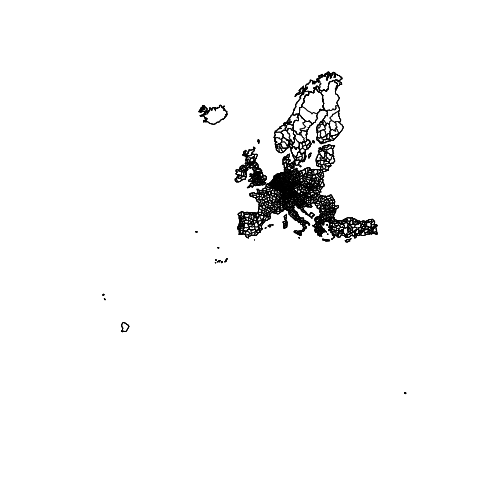

In [86]:
%%R
plot(EU_NUTS)

În primă fază am descărcat o hartă cu țări din euroap și regiuniile lor administrative. Acum urmează să descărcăm date textuale. Vom folosi un set de date care arată rata somajului per regiune in functie de sex,vârstă, și an. Pentru fiecare regiune vom face o cloana cu una din comvinațiile de sex,vârstă și an. În tabela EurostatTOC putem accesa taote bazele de date prin codul de pe coloana numită "code".


In [ ]:
%%R
EurostatTOC <- getEurostatTOC()
head(EurostatTOC)
data <- getEurostatRCV(kod = "lfst_r_lfu3rt")

In [52]:
%%R
head(data)

                      unit    age sex  geo time value
PC_Y15-24_F_AT_2019     PC Y15-24   F   AT 2019   7.8
PC_Y15-24_F_AT1_2019    PC Y15-24   F  AT1 2019  11.8
PC_Y15-24_F_AT11_2019   PC Y15-24   F AT11 2019    NA
PC_Y15-24_F_AT12_2019   PC Y15-24   F AT12 2019   9.2
PC_Y15-24_F_AT13_2019   PC Y15-24   F AT13 2019  14.5
PC_Y15-24_F_AT2_2019    PC Y15-24   F  AT2 2019    NA


NULL


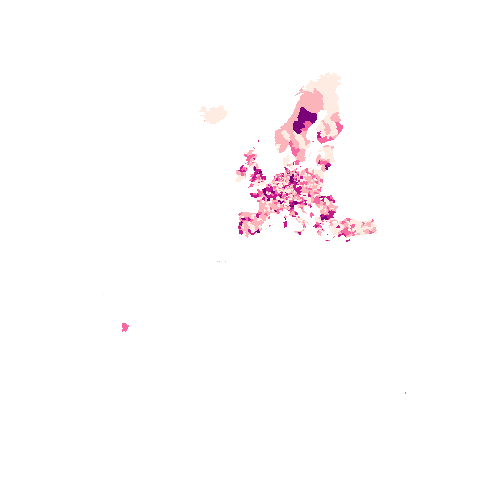

In [88]:
%%R
library("data.table")
library("dplyr")
mapdata <- dcast(setDT(data), geo ~ time + age + sex)
EU_NUTS@data <- inner_join(EU_NUTS@data, mapdata, by = c("NUTS_ID" = "geo"))
my_colours <- brewer.pal(5, "RdPu")
breaks <- classIntervals(EU_NUTS@data[["2012_Y20-64_T"]], n = 5, style = "fisher", unique = TRUE)$brks
plot <- plot(EU_NUTS, col = my_colours[findInterval(EU_NUTS@data[["2012_Y20-64_T"]], breaks, all.inside = TRUE)], axes = FALSE, border = NA)
plot

# Exerciții

## 1. Pornind de la baza de date din capitolul Eurostat, calculati urmatoarele:
 - media ratei de someri din zona AT
 - mediana ratei de someri din zona AT1

In [95]:
%%R
head(data)

data_at <- data[data$geo == "AT"]
# head(data_at)
data_at1 <- data[data$geo == "AT1"]
# head(data_at1)

mean.result = mean(data_at$value) # calculate mean
print (mean.result)

median.result = median(data_at1$value) # calculate median
print (median.result)

[1] 5.68381
[1] 6.6


## 2.
Biroul australian de statistică a estimat că în 2012, în Australia erau 22.683.600 de locuitori, cu o creștere de 1.6% față de anul trecut. Considerând că această rată de creștere e constantă de-a lungul anilor, calculați care era populația in 2007.


In [124]:
%%R
population <- 22683600
rate <- 0.016
time <- 5
print(population / exp(rate*time))

[1] 20939602


## 3. Folosind ca exemplu albumele de la capitolul 'Probabilitați', calculați:
 - Care este probabillitatea ca, ascultând 50 de melodii aleatorii de pe cele 2 albume, fix 5 sa fie cântate de Adrian Minune sau de Vali Vijelie?
 -  Care este probabillitatea ca o melodie cântata de Adrian Minune sau de Mihaiță Piticul sa fie o melodie de pe albumul L’ESPERANCE HITS 2008 în același timp.

In [122]:
%%R
# probabilitatea ca ascultand 50 de piese de pe ambele albume, 5 sa fie ale lui adi sau ale lui vali
piese_adi <- sum(album_1$autor=="Adrian Minune") + sum(album_2$autor=="Adrian Minune")
piese_vali <- sum(album_1$autor=="Vali Vijelie") + sum(album_2$autor=="Vali Vijelie")
piese_total = length(album_1$autor) + length(album_2$autor)
prob_adi <- piese_adi / piese_total
prob_vali <- piese_vali / piese_total

print(binom_probability(prob_adi + prob_vali, 5, 50))

# probabilitatea ca o melodie cantata de adi sau de piticu sa fie pe esperance
piese_adi_piticu_esperance <- sum(album_1$autor=="Adrian Minune") + sum(album_1$autor=="Mihaita Piticul")
piese_adi_pitucu_fortza <- sum(album_2$autor=="Adrian Minune") + sum(album_2$autor=="Mihaita Piticul")

print(piese_adi_piticu_esperance / (piese_adi_piticu_esperance + piese_adi_pitucu_fortza))

[1] 0.07450226
[1] 0.8


## 4. Considerând informațiile din capitolul 'Multiple Intrusion detection systems'.
 - Care este probabilitatea ca primul IDS să dea false positive și al doilea true negative în cazul unui pachet de date?
 - Care este probabilitatea ca un pachet legitim să fie considerat virus?


In [123]:
%%R
# probabilitatea ca primul IDS sa dea FP si al doilea TN in cazul unui pachet
test_ft_malitios <- f_pozitive_rate_1 * t_negative_rate_2
print(test_ft_malitios)

# probabilitatea ca un pachet legitim sa fie considerat virus
# IDS1 il considera virus
p1 <- f_negative_rate_1;
# ID2 il considera virus
p2 <- t_pozitive_rate_1 * f_negative_rate_2;
print(p1 + p2);

[1] 0.0392
[1] 0.0688
